# Options Pricing pour un portefeuille consitué de 2 actifs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from scipy.stats import norm
import time

In [2]:
def monte_carlo_pricing_call(S0, K, r, sigma, T, M):
    """
    Simule le pricing d'un call européen avec la méthode de Monte Carlo.

    Arguments :
    - S0 : Prix initial de l'actif sous-jacent
    - K : Prix d'exercice de l'option
    - r : Taux sans risque
    - sigma : Volatilité de l'actif
    - T : Maturité (en années)
    - M : Nombre de simulations Monte Carlo

    Retourne : Prix estimé de l'option
    """
    # Génération des trajectoires simulées de S_T
    Z = np.random.standard_normal(M)  # Variables normales standard
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calcul du payoff pour chaque trajectoire
    payoff = np.maximum(ST - K, 0)

    # Actualisation des payoffs
    payoff_actualise = np.exp(-r * T) * payoff

    # Prix de l'option : moyenne des payoffs actualisés
    prix_option = np.mean(payoff_actualise)

    return prix_option

def black_scholes_call(S0, K, r, sigma, T):
    """
    Calcule le prix d'un call européen en utilisant la formule de Black-Scholes.
    
    Retourne : Prix de l'option
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price




In [4]:
# Paramètres de l'option
S0 = 100      
K = 110       
r = 0.05     
sigma = 0.2   
T = 1         
M = 100000  

# Calculs
prix_call_monte_carlo = monte_carlo_pricing_call(S0, K, r, sigma, T, M)
prix_call_black_scholes = black_scholes_call(S0, K, r, sigma, T)

print(f"Prix estimé du call européen (Monte Carlo) : {prix_call_monte_carlo:.4f}")
print(f"Prix du call européen (Black-Scholes) : {prix_call_black_scholes:.4f}")

Prix estimé du call européen (Monte Carlo) : 6.0099
Prix du call européen (Black-Scholes) : 6.0401


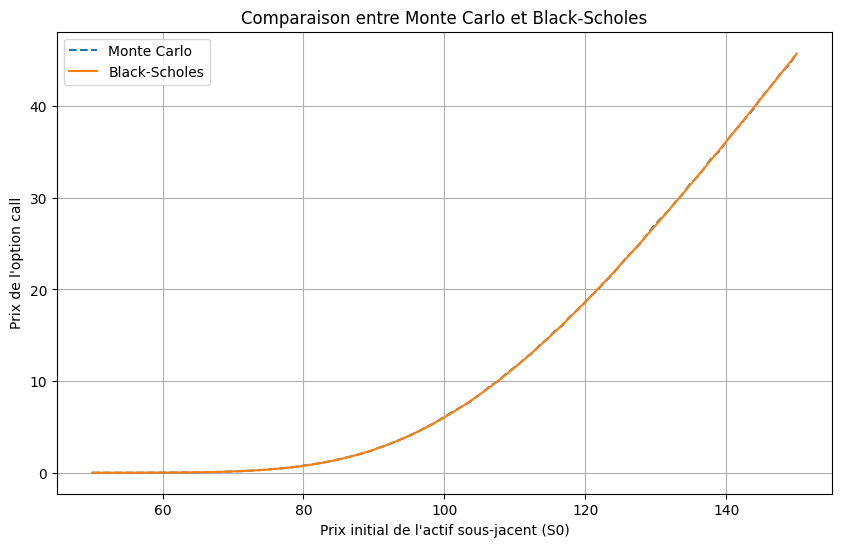

In [5]:
# Graphique : comparaison en fonction de S0
S0_range = np.linspace(50, 150, 100)
monte_carlo_prices = [monte_carlo_pricing_call(S, K, r, sigma, T, M) for S in S0_range]
black_scholes_prices = [black_scholes_call(S, K, r, sigma, T) for S in S0_range]

plt.figure(figsize=(10, 6))
plt.plot(S0_range, monte_carlo_prices, label="Monte Carlo", linestyle="--")
plt.plot(S0_range, black_scholes_prices, label="Black-Scholes", linestyle="-")
plt.xlabel("Prix initial de l'actif sous-jacent (S0)")
plt.ylabel("Prix de l'option call")
plt.title("Comparaison entre Monte Carlo et Black-Scholes")
plt.legend()

plt.grid()
plt.show()

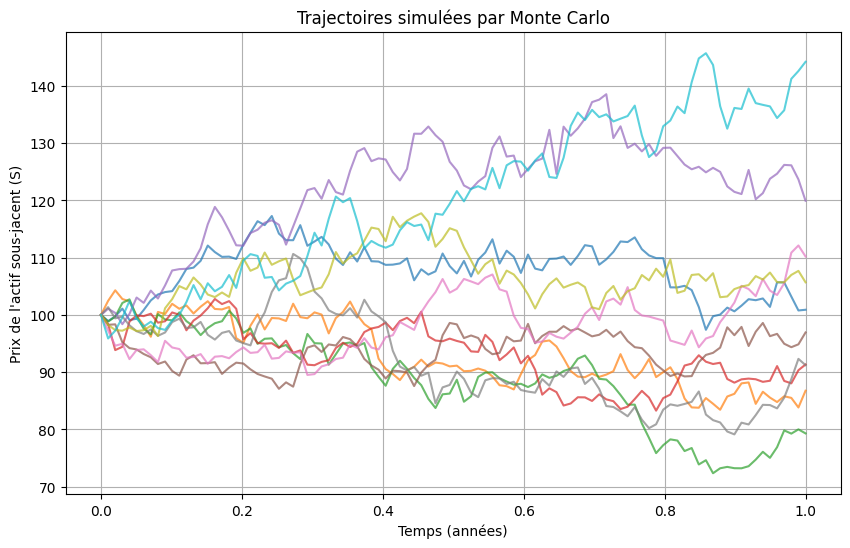

In [6]:
# Illustration trajectoires Monte Carlo
plt.figure(figsize=(10, 6))
num_trajectoires = 10  # Nombre de trajectoires à afficher
T_steps = 100  # Nombre de pas de temps

time_grid = np.linspace(0, T, T_steps)
for i in range(num_trajectoires):
    Z = np.random.standard_normal(T_steps)
    S_path = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * (T / T_steps) + sigma * np.sqrt(T / T_steps) * Z))
    S_path[0] = S0  # Recalibrage au point initial
    plt.plot(time_grid, S_path, alpha=0.7)

plt.xlabel("Temps (années)")
plt.ylabel("Prix de l'actif sous-jacent (S)")
plt.title("Trajectoires simulées par Monte Carlo")
plt.grid()
plt.show()

# Estimation de sigma

In [7]:
#sigma empirique par MC(moyenne)
def calcul_volatilite_historique(prix_actif, delta_t=1/252):
    """
    Calcule la volatilité historique à partir des prix de l'actif.

    Arguments :
    - prix_actif : Liste ou tableau des prix de l'actif.
    - delta_t : Intervalle de temps entre les prix (1 jour de trading = 1/252 année).

    Retourne :
    - Volatilité estimée (sigma).
    """
    rendements = np.log(prix_actif[1:] / prix_actif[:-1])  # ln(St+1/St) 
    volatilite = np.std(rendements) / np.sqrt(delta_t)     # Ajustement en fonction de delta_t
    return volatilite


In [9]:
prix_historique = np.array([100, 101, 102, 99, 98, 100, 105, 110])
prix_historique[:-1]

array([100, 101, 102,  99,  98, 100, 105])

In [8]:
# Exemple
prix_historique = np.array([100, 101, 102, 99, 98, 100, 105, 110])  # Exemple de prix

# Estimation de la volatilité
sigma_estime = calcul_volatilite_historique(prix_historique)
print(f"Volatilité estimée : {sigma_estime:.4f}")


Volatilité estimée : 0.4177


TypeError: cannot unpack non-iterable numpy.float64 object

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm

# Paramètres pour la simulation des données
n_samples = 10000
S = np.random.uniform(50, 150, n_samples)  # Prix du sous-jacent
K = np.random.uniform(50, 150, n_samples)  # Prix d'exercice
T = np.random.uniform(0.5, 2, n_samples)   # Maturité en années
r = np.random.uniform(0.01, 0.05, n_samples)  # Taux d'intérêt sans risque
sigma = np.random.uniform(0.1, 0.5, n_samples)  # Volatilité

# Black-Scholes Formula pour le prix d'une option d'achat européenne
d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
prices = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Préparer les données d'entrée et de sortie
X = np.column_stack((S, K, T, r, sigma))
y = prices

# Création du modèle
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Prédiction avec le modèle entraîné
S_test = 100
K_test = 100
T_test = 1
r_test = 0.03
sigma_test = 0.2
X_test = np.array([[S_test, K_test, T_test, r_test, sigma_test]])
predicted_price = model.predict(X_test)

print("Prix prédit de l'option:", predicted_price[0][0])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 371.5570 - val_loss: 16.2369
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.8670 - val_loss: 17.9676
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.9941 - val_loss: 14.1701
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1599 - val_loss: 13.3872
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6740 - val_loss: 13.8537
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3769 - val_loss: 11.6280
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9978 - val_loss: 10.5053
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.1494 - val_loss: 9.8115
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.7288 - val_loss: 10.1296
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9667 - val_loss: 8.5889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prix prédit de l'option: 12.75198


In [ ]:
#determiner a partir de K une volatilité pour un actif donné. voir si ca colle avec la realité.